### Install and import libs

In [1]:
# load helper functions for dynamic import
def import_package(name):
    try:
        module = __import__(name)
    except:
        if name == 'pandas_profiling':
            name = 'pandas-profiling'
        ! pip install $name
        module = __import__(name)
    try:
        print(f'{name}'+ ' Version:', module.__version__)
    except AttributeError:
        pass
    return module

In [2]:
pd = import_package('pandas')
profile = import_package('pandas_profiling')
np = import_package('numpy')
tz = import_package('dateutil').tz
datetime = import_package('datetime').datetime

pandas Version: 1.0.5
pandas_profiling Version: 2.10.1
numpy Version: 1.18.5
dateutil Version: 2.8.1


### Import data

In [3]:
asset = "/Users/nancy/Downloads/Data/Test/data/Energy Consumption/NeedEnergy Meter Data/NeedEnergy API Data/data/data_hourly_id_47803.csv"

In [4]:
def load_data(file):
    df = pd.read_csv(file)
    df = df.astype({'date':'datetime64[ns]'})
    df.sort_values(by='date', inplace=True)
    return df

In [5]:
df_raw = load_data(asset)

In [6]:
df_raw.head()

,date,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency,active,reactive,voltages,phaseVoltages,currentHarmonics,voltageHarmonics
0,2020-03-15 18:00:00,1584288000000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,"[1.3, 78.9, -45.1, -297.3, -163.6, 321.1, 143....","[6.2, 38.9, 15.3, 534.8, 1134.3, 151.0, 1309.9...","[245.8, None, None]","[245.8, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
1,2020-03-15 19:00:00,1584291600000,913.000,0.0,0.0,913.000,0.0,0.0,0.0,"[1.2, 596.1, -509.8, 72.6, 0.0, 907.0, 2273.7,...","[6.0, 343.5, 228.7, 262.0, 0.2, 439.9, 2077.9,...","[245.6, None, None]","[245.6, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2,2020-03-15 20:00:00,1584295200000,623.471,0.0,0.0,623.471,0.0,0.0,0.0,"[1.5, 44.8, 0.0, None, None, 387.2, 1148.0, 6....","[7.4, 10.8, 0.0, None, None, 155.4, 1374.2, 3....","[244.9, None, None]","[244.9, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
3,2020-03-15 21:00:00,1584298800000,765.984,0.0,0.0,765.984,0.0,0.0,0.0,"[1.2, 44.4, 0.0, None, None, 332.9, 1118.7, 4....","[6.0, 10.8, 0.0, None, None, 145.8, 1314.5, 2....","[244.4, None, None]","[244.4, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
4,2020-03-15 22:00:00,1584302400000,585.041,0.0,0.0,585.041,0.0,0.0,0.0,"[1.5, 44.4, 0.0, None, None, 329.0, 1414.6, 5....","[7.5, 10.8, 0.0, None, None, 155.1, 1395.1, 3....","[244.8, None, None]","[244.8, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."


### Data Summary

In [7]:
#basic profiling
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7979 entries, 0 to 7978
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              7979 non-null   datetime64[ns]
 1   timestamp         7979 non-null   int64         
 2   consumption       7979 non-null   float64       
 3   solar             7979 non-null   float64       
 4   alwaysOn          7979 non-null   float64       
 5   gridImport        7979 non-null   float64       
 6   gridExport        7979 non-null   float64       
 7   selfConsumption   7979 non-null   float64       
 8   selfSufficiency   7979 non-null   float64       
 9   active            7979 non-null   object        
 10  reactive          7979 non-null   object        
 11  voltages          7979 non-null   object        
 12  phaseVoltages     7979 non-null   object        
 13  currentHarmonics  7979 non-null   object        
 14  voltageHarmonics  7979 n

In [8]:
#statistcal summary
df_raw.describe

<bound method NDFrame.describe of                     date      timestamp  consumption    solar  alwaysOn  \
0    2020-03-15 18:00:00  1584288000000        0.000    0.000     0.000   
1    2020-03-15 19:00:00  1584291600000      913.000    0.000     0.000   
2    2020-03-15 20:00:00  1584295200000      623.471    0.000     0.000   
3    2020-03-15 21:00:00  1584298800000      765.984    0.000     0.000   
4    2020-03-15 22:00:00  1584302400000      585.041    0.000     0.000   
...                  ...            ...          ...      ...       ...   
7974 2021-02-11 21:00:00  1613070000000     1973.376  572.885  1006.751   
7975 2021-02-11 22:00:00  1613073600000     1995.612  576.278  1006.751   
7976 2021-02-11 23:00:00  1613077200000     2020.629  564.869  1006.751   
7977 2021-02-12 00:00:00  1613080800000     1960.142  556.150  1006.751   
7978 2021-02-12 01:00:00  1613084400000     1970.954  555.986  1006.751   

      gridImport  gridExport  selfConsumption  selfSufficiency  \

In [9]:
#List of features
df_raw.columns

Index(['date', 'timestamp', 'consumption', 'solar', 'alwaysOn', 'gridImport',
       'gridExport', 'selfConsumption', 'selfSufficiency', 'active',
       'reactive', 'voltages', 'phaseVoltages', 'currentHarmonics',
       'voltageHarmonics'],
      dtype='object')

In [10]:
profile.ProfileReport(df_raw)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Quality

In [11]:
df_qa = df_raw.copy()

In [12]:
df_qa.head()

,date,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency,active,reactive,voltages,phaseVoltages,currentHarmonics,voltageHarmonics
0,2020-03-15 18:00:00,1584288000000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,"[1.3, 78.9, -45.1, -297.3, -163.6, 321.1, 143....","[6.2, 38.9, 15.3, 534.8, 1134.3, 151.0, 1309.9...","[245.8, None, None]","[245.8, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
1,2020-03-15 19:00:00,1584291600000,913.000,0.0,0.0,913.000,0.0,0.0,0.0,"[1.2, 596.1, -509.8, 72.6, 0.0, 907.0, 2273.7,...","[6.0, 343.5, 228.7, 262.0, 0.2, 439.9, 2077.9,...","[245.6, None, None]","[245.6, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2,2020-03-15 20:00:00,1584295200000,623.471,0.0,0.0,623.471,0.0,0.0,0.0,"[1.5, 44.8, 0.0, None, None, 387.2, 1148.0, 6....","[7.4, 10.8, 0.0, None, None, 155.4, 1374.2, 3....","[244.9, None, None]","[244.9, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
3,2020-03-15 21:00:00,1584298800000,765.984,0.0,0.0,765.984,0.0,0.0,0.0,"[1.2, 44.4, 0.0, None, None, 332.9, 1118.7, 4....","[6.0, 10.8, 0.0, None, None, 145.8, 1314.5, 2....","[244.4, None, None]","[244.4, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
4,2020-03-15 22:00:00,1584302400000,585.041,0.0,0.0,585.041,0.0,0.0,0.0,"[1.5, 44.4, 0.0, None, None, 329.0, 1414.6, 5....","[7.5, 10.8, 0.0, None, None, 155.1, 1395.1, 3....","[244.8, None, None]","[244.8, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."


In [13]:
#Check for duplicates
df_qa.index[df_qa['date'].duplicated(keep=False)==True]

Int64Index([], dtype='int64')

missingno Version: 0.4.2


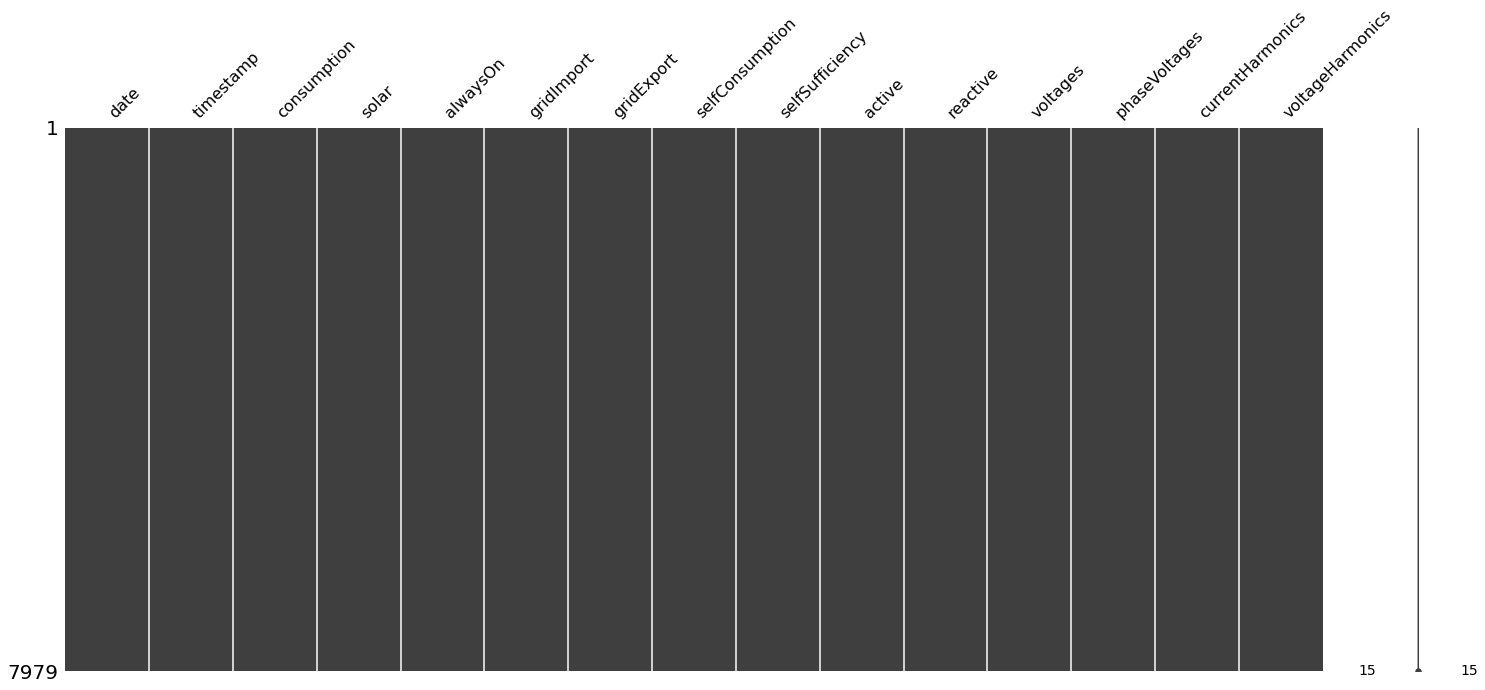

In [14]:
# Check for missing info using Missingno Package
msno = import_package('missingno')
msno.matrix(df_qa) 

In [18]:
# Check if there are any periods of zero values
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features = df_qa.select_dtypes(include=numerics).columns 
for feature in features: 
    zero_results = df_qa[df_qa[feature]==0]
zero_results.head()

,date,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency,active,reactive,voltages,phaseVoltages,currentHarmonics,voltageHarmonics
0,2020-03-15 18:00:00,1584288000000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,"[1.3, 78.9, -45.1, -297.3, -163.6, 321.1, 143....","[6.2, 38.9, 15.3, 534.8, 1134.3, 151.0, 1309.9...","[245.8, None, None]","[245.8, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
1,2020-03-15 19:00:00,1584291600000,913.000,0.0,0.0,913.000,0.0,0.0,0.0,"[1.2, 596.1, -509.8, 72.6, 0.0, 907.0, 2273.7,...","[6.0, 343.5, 228.7, 262.0, 0.2, 439.9, 2077.9,...","[245.6, None, None]","[245.6, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2,2020-03-15 20:00:00,1584295200000,623.471,0.0,0.0,623.471,0.0,0.0,0.0,"[1.5, 44.8, 0.0, None, None, 387.2, 1148.0, 6....","[7.4, 10.8, 0.0, None, None, 155.4, 1374.2, 3....","[244.9, None, None]","[244.9, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
3,2020-03-15 21:00:00,1584298800000,765.984,0.0,0.0,765.984,0.0,0.0,0.0,"[1.2, 44.4, 0.0, None, None, 332.9, 1118.7, 4....","[6.0, 10.8, 0.0, None, None, 145.8, 1314.5, 2....","[244.4, None, None]","[244.4, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
4,2020-03-15 22:00:00,1584302400000,585.041,0.0,0.0,585.041,0.0,0.0,0.0,"[1.5, 44.4, 0.0, None, None, 329.0, 1414.6, 5....","[7.5, 10.8, 0.0, None, None, 155.1, 1395.1, 3....","[244.8, None, None]","[244.8, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."


In [19]:
# Check for any missing time steps, create hourly datetime index and compare to length of dataframe
start = df_qa['date'].min()
end = df_qa['date'].max()
full_index = pd.date_range(start, end, freq='H')
len(full_index) == len(df_qa)

False

In [20]:
df_qa.set_index('date', inplace = True)
df_qa = df_qa.reindex(full_index)
df_qa.index

DatetimeIndex(['2020-03-15 18:00:00', '2020-03-15 19:00:00',
               '2020-03-15 20:00:00', '2020-03-15 21:00:00',
               '2020-03-15 22:00:00', '2020-03-15 23:00:00',
               '2020-03-16 00:00:00', '2020-03-16 01:00:00',
               '2020-03-16 02:00:00', '2020-03-16 03:00:00',
               ...
               '2021-02-11 16:00:00', '2021-02-11 17:00:00',
               '2021-02-11 18:00:00', '2021-02-11 19:00:00',
               '2021-02-11 20:00:00', '2021-02-11 21:00:00',
               '2021-02-11 22:00:00', '2021-02-11 23:00:00',
               '2021-02-12 00:00:00', '2021-02-12 01:00:00'],
              dtype='datetime64[ns]', length=8000, freq='H')

In [21]:
#Have a look at missing values
print(f"{df_qa.isnull().sum()}\n\n")
print(f"Percentage of missing values:\t{df_qa['consumption'].isnull().sum()/df_qa['timestamp'].count()}")

timestamp           21
consumption         21
solar               21
alwaysOn            21
gridImport          21
gridExport          21
selfConsumption     21
selfSufficiency     21
active              21
reactive            21
voltages            21
phaseVoltages       21
currentHarmonics    21
voltageHarmonics    21
dtype: int64


Percentage of missing values:	0.0026319087604963027


### Feature Engineering Time Series

In [183]:
df_fe = df_qa.copy()
df_fe.head()

,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency,active,reactive,voltages,phaseVoltages,currentHarmonics,voltageHarmonics
2020-03-15 18:00:00,1.584288e+12,0.000,0.0,0.0,0.000,0.0,0.0,0.0,"[1.3, 78.9, -45.1, -297.3, -163.6, 321.1, 143....","[6.2, 38.9, 15.3, 534.8, 1134.3, 151.0, 1309.9...","[245.8, None, None]","[245.8, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2020-03-15 19:00:00,1.584292e+12,913.000,0.0,0.0,913.000,0.0,0.0,0.0,"[1.2, 596.1, -509.8, 72.6, 0.0, 907.0, 2273.7,...","[6.0, 343.5, 228.7, 262.0, 0.2, 439.9, 2077.9,...","[245.6, None, None]","[245.6, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2020-03-15 20:00:00,1.584295e+12,623.471,0.0,0.0,623.471,0.0,0.0,0.0,"[1.5, 44.8, 0.0, None, None, 387.2, 1148.0, 6....","[7.4, 10.8, 0.0, None, None, 155.4, 1374.2, 3....","[244.9, None, None]","[244.9, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2020-03-15 21:00:00,1.584299e+12,765.984,0.0,0.0,765.984,0.0,0.0,0.0,"[1.2, 44.4, 0.0, None, None, 332.9, 1118.7, 4....","[6.0, 10.8, 0.0, None, None, 145.8, 1314.5, 2....","[244.4, None, None]","[244.4, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2020-03-15 22:00:00,1.584302e+12,585.041,0.0,0.0,585.041,0.0,0.0,0.0,"[1.5, 44.4, 0.0, None, None, 329.0, 1414.6, 5....","[7.5, 10.8, 0.0, None, None, 155.1, 1395.1, 3....","[244.8, None, None]","[244.8, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."


In [186]:
df_fe = pd.DataFrame(df_fe['consumption'])
df_fe

,consumption
2020-03-15 18:00:00,0.000
2020-03-15 19:00:00,913.000
2020-03-15 20:00:00,623.471
2020-03-15 21:00:00,765.984
2020-03-15 22:00:00,585.041
...,...
2021-02-11 21:00:00,1973.376
2021-02-11 22:00:00,1995.612
2021-02-11 23:00:00,2020.629
2021-02-12 00:00:00,1960.142


In [187]:
df_fe.reset_index(inplace=True)
df_fe.rename(columns = {'index':'datetime'}, inplace = True)
df_fe.head()

,datetime,consumption
0,2020-03-15 18:00:00,0.000
1,2020-03-15 19:00:00,913.000
2,2020-03-15 20:00:00,623.471
3,2020-03-15 21:00:00,765.984
4,2020-03-15 22:00:00,585.041


In [188]:
#Feature Engineering of Time Series
df_fe['date'] = df_fe['datetime'].dt.strftime('%Y-%m-%d')
df_fe['year'] = df_fe['datetime'].dt.year 
df_fe['dayOfYear'] = df_fe['datetime'].dt.dayofyear
df_fe['month'] = df_fe['datetime'].dt.month 
df_fe['monthName'] = pd.DatetimeIndex(df_fe['datetime']).month_name()
df_fe['week'] = df_fe['datetime'].dt.week
df_fe['day'] = df_fe['datetime'].dt.day
df_fe['dayName'] = pd.DatetimeIndex(df_fe['datetime']).day_name()
df_fe['hour'] = df_fe['datetime'].dt.hour
df_fe['minute'] = df_fe['datetime'].dt.minute
df_fe['dayOfWeek'] = df_fe['datetime'].dt.dayofweek
df_fe['weekend'] = df_fe['dayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df_fe['time'] = df_fe['datetime'].dt.time 
df_fe['time_Str'] = df_fe['datetime'].dt.time.astype(str)   
df_fe['dayMonth'] = df_fe["datetime"].dt.strftime('%m-%d')
df_fe['hourMinute'] = df_fe["datetime"].dt.strftime('%H:%M')

bins = [0,4,8,12,16,20,24]
labels = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df_fe['session'] = pd.cut(df_fe['hour'], bins=bins, labels=labels, include_lowest=True)

### Remove Duplicates

In [189]:
df_fe = df_fe[~df_fe['datetime'].duplicated(keep = 'first')]
df_fe.head()

,datetime,consumption,date,year,dayOfYear,month,monthName,week,day,dayName,hour,minute,dayOfWeek,weekend,time,time_Str,dayMonth,hourMinute,session
0,2020-03-15 18:00:00,0.000,2020-03-15,2020,75,3,March,11,15,Sunday,18,0,6,1,18:00:00,18:00:00,03-15,18:00,Eve
1,2020-03-15 19:00:00,913.000,2020-03-15,2020,75,3,March,11,15,Sunday,19,0,6,1,19:00:00,19:00:00,03-15,19:00,Eve
2,2020-03-15 20:00:00,623.471,2020-03-15,2020,75,3,March,11,15,Sunday,20,0,6,1,20:00:00,20:00:00,03-15,20:00,Eve
3,2020-03-15 21:00:00,765.984,2020-03-15,2020,75,3,March,11,15,Sunday,21,0,6,1,21:00:00,21:00:00,03-15,21:00,Night
4,2020-03-15 22:00:00,585.041,2020-03-15,2020,75,3,March,11,15,Sunday,22,0,6,1,22:00:00,22:00:00,03-15,22:00,Night


### Missing Data Imputation

In [190]:
df_fe1 = df_fe.copy()
df_fe1.head()

,datetime,consumption,date,year,dayOfYear,month,monthName,week,day,dayName,hour,minute,dayOfWeek,weekend,time,time_Str,dayMonth,hourMinute,session
0,2020-03-15 18:00:00,0.000,2020-03-15,2020,75,3,March,11,15,Sunday,18,0,6,1,18:00:00,18:00:00,03-15,18:00,Eve
1,2020-03-15 19:00:00,913.000,2020-03-15,2020,75,3,March,11,15,Sunday,19,0,6,1,19:00:00,19:00:00,03-15,19:00,Eve
2,2020-03-15 20:00:00,623.471,2020-03-15,2020,75,3,March,11,15,Sunday,20,0,6,1,20:00:00,20:00:00,03-15,20:00,Eve
3,2020-03-15 21:00:00,765.984,2020-03-15,2020,75,3,March,11,15,Sunday,21,0,6,1,21:00:00,21:00:00,03-15,21:00,Night
4,2020-03-15 22:00:00,585.041,2020-03-15,2020,75,3,March,11,15,Sunday,22,0,6,1,22:00:00,22:00:00,03-15,22:00,Night


In [191]:
# Only do consumption imputation
# Only 21 rows are missing, use simple forward fill to replace NaN values
df_fe1['consumption'] = df_fe1['consumption'].replace(0,np.nan)
df_fe1['consumption'] = df_fe1['consumption'].fillna(method = 'bfill')   
df_fe1.head()

,datetime,consumption,date,year,dayOfYear,month,monthName,week,day,dayName,hour,minute,dayOfWeek,weekend,time,time_Str,dayMonth,hourMinute,session
0,2020-03-15 18:00:00,913.000,2020-03-15,2020,75,3,March,11,15,Sunday,18,0,6,1,18:00:00,18:00:00,03-15,18:00,Eve
1,2020-03-15 19:00:00,913.000,2020-03-15,2020,75,3,March,11,15,Sunday,19,0,6,1,19:00:00,19:00:00,03-15,19:00,Eve
2,2020-03-15 20:00:00,623.471,2020-03-15,2020,75,3,March,11,15,Sunday,20,0,6,1,20:00:00,20:00:00,03-15,20:00,Eve
3,2020-03-15 21:00:00,765.984,2020-03-15,2020,75,3,March,11,15,Sunday,21,0,6,1,21:00:00,21:00:00,03-15,21:00,Night
4,2020-03-15 22:00:00,585.041,2020-03-15,2020,75,3,March,11,15,Sunday,22,0,6,1,22:00:00,22:00:00,03-15,22:00,Night


### Merge Other Datasets - Weather

In [192]:
weather_df = pd.read_csv("/Users/nancy/Downloads/Data/Test/data/Harare_Hourly_Weather_2005-2021.csv")
weather_df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1104537600,2005-01-01 00:00:00 +0000 UTC,7200,Harare,-17.821629,31.049226,17.07,17.85,16.06,17.40,...,90,NaN,NaN,NaN,NaN,96,211,Thunderstorm,proximity thunderstorm,11n
1,1104541200,2005-01-01 01:00:00 +0000 UTC,7200,Harare,-17.821629,31.049226,16.85,18.03,16.01,17.28,...,100,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
2,1104544800,2005-01-01 02:00:00 +0000 UTC,7200,Harare,-17.821629,31.049226,16.70,18.17,15.78,17.13,...,90,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
3,1104548400,2005-01-01 03:00:00 +0000 UTC,7200,Harare,-17.821629,31.049226,17.23,18.84,16.70,18.43,...,140,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
4,1104552000,2005-01-01 04:00:00 +0000 UTC,7200,Harare,-17.821629,31.049226,17.57,18.82,17.00,18.47,...,51,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d


In [193]:
# Temperature, humidity and cloud cover are wanted variables
weather_df.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon'],
      dtype='object')

In [194]:
weather_df = weather_df[['dt_iso', 'temp', 'humidity', 'clouds_all']]
weather_df.rename(columns={'dt_iso':'datetime'},inplace=True)
weather_df.head()

,datetime,temp,humidity,clouds_all
0,2005-01-01 00:00:00 +0000 UTC,17.07,91,96
1,2005-01-01 01:00:00 +0000 UTC,16.85,93,0
2,2005-01-01 02:00:00 +0000 UTC,16.70,93,0
3,2005-01-01 03:00:00 +0000 UTC,17.23,92,75
4,2005-01-01 04:00:00 +0000 UTC,17.57,88,75


In [195]:
weather_df['datetime'] = weather_df['datetime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S %z %Z').strftime('%Y-%m-%d %H:%M:%S'))
weather_df.head()

,datetime,temp,humidity,clouds_all
0,2005-01-01 00:00:00,17.07,91,96
1,2005-01-01 01:00:00,16.85,93,0
2,2005-01-01 02:00:00,16.70,93,0
3,2005-01-01 03:00:00,17.23,92,75
4,2005-01-01 04:00:00,17.57,88,75


In [196]:
# Slice datarame for 2020 onwards
weather_df = weather_df.loc[pd.to_datetime(weather_df['datetime']).dt.year >= 2020]
weather_df

,datetime,temp,humidity,clouds_all
132059,2020-01-01 00:00:00,20.11,71,94
132060,2020-01-01 01:00:00,20.05,72,92
132061,2020-01-01 02:00:00,19.76,73,94
132062,2020-01-01 03:00:00,22.10,67,96
132063,2020-01-01 04:00:00,21.34,72,0
...,...,...,...,...
141822,2021-02-10 19:00:00,19.45,85,0
141823,2021-02-10 20:00:00,18.45,88,77
141824,2021-02-10 21:00:00,19.19,86,77
141825,2021-02-10 22:00:00,18.85,86,77


In [197]:
# Check there are no missing rows/hours
weather_start = weather_df['datetime'].min()
weather_end = weather_df['datetime'].max()
weather_full_index = pd.date_range(weather_start, weather_end, freq='H')
len(full_index) == len(weather_df)

False

In [198]:
weather_df.set_index('datetime', inplace = True)
weather_df = weather_df.reindex(weather_full_index)
weather_df.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2021-02-10 14:00:00', '2021-02-10 15:00:00',
               '2021-02-10 16:00:00', '2021-02-10 17:00:00',
               '2021-02-10 18:00:00', '2021-02-10 19:00:00',
               '2021-02-10 20:00:00', '2021-02-10 21:00:00',
               '2021-02-10 22:00:00', '2021-02-10 23:00:00'],
              dtype='datetime64[ns]', length=9768, freq='H')

In [199]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
weather_features = weather_df.select_dtypes(include=numerics).columns 
for feature in weather_features:
    weather_df[feature] = weather_df[feature].replace(0,np.nan)
    weather_df[feature] = weather_df[feature].fillna(method = 'bfill')   
weather_df.reset_index(inplace = True)
weather_df.rename(columns = {'index':'datetime'}, inplace = True)
weather_df.head()

,datetime,temp,humidity,clouds_all
0,2020-01-01 00:00:00,20.11,71,94.0
1,2020-01-01 01:00:00,20.05,72,92.0
2,2020-01-01 02:00:00,19.76,73,94.0
3,2020-01-01 03:00:00,22.10,67,96.0
4,2020-01-01 04:00:00,21.34,72,75.0


In [200]:
df_fe1['datetime'] = pd.to_datetime(df_fe1['datetime'], utc = False)
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], utc = False)
combined_df = pd.merge(df_fe1, weather_df)

# Drop last couple of days where we do not have weather data
combined_df

,datetime,consumption,date,year,dayOfYear,month,monthName,week,day,dayName,...,dayOfWeek,weekend,time,time_Str,dayMonth,hourMinute,session,temp,humidity,clouds_all
0,2020-03-15 18:00:00,913.000,2020-03-15,2020,75,3,March,11,15,Sunday,...,6,1,18:00:00,18:00:00,03-15,18:00,Eve,22.41,53,84.0
1,2020-03-15 19:00:00,913.000,2020-03-15,2020,75,3,March,11,15,Sunday,...,6,1,19:00:00,19:00:00,03-15,19:00,Eve,22.45,49,84.0
2,2020-03-15 20:00:00,623.471,2020-03-15,2020,75,3,March,11,15,Sunday,...,6,1,20:00:00,20:00:00,03-15,20:00,Eve,22.27,49,84.0
3,2020-03-15 21:00:00,765.984,2020-03-15,2020,75,3,March,11,15,Sunday,...,6,1,21:00:00,21:00:00,03-15,21:00,Night,20.02,69,84.0
4,2020-03-15 22:00:00,585.041,2020-03-15,2020,75,3,March,11,15,Sunday,...,6,1,22:00:00,22:00:00,03-15,22:00,Night,18.74,77,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7969,2021-02-10 19:00:00,3394.210,2021-02-10,2021,41,2,February,6,10,Wednesday,...,2,0,19:00:00,19:00:00,02-10,19:00,Eve,19.45,85,77.0
7970,2021-02-10 20:00:00,2118.756,2021-02-10,2021,41,2,February,6,10,Wednesday,...,2,0,20:00:00,20:00:00,02-10,20:00,Eve,18.45,88,77.0
7971,2021-02-10 21:00:00,2140.266,2021-02-10,2021,41,2,February,6,10,Wednesday,...,2,0,21:00:00,21:00:00,02-10,21:00,Night,19.19,86,77.0
7972,2021-02-10 22:00:00,2143.942,2021-02-10,2021,41,2,February,6,10,Wednesday,...,2,0,22:00:00,22:00:00,02-10,22:00,Night,18.85,86,77.0


### Merge Other Datasets - Public Holiday

In [201]:
holiday_df = pd.read_csv("/Users/nancy/Downloads/Data/Test/data/public_holidays_weekends_SA.csv")

In [202]:
holiday_df.head()

,day,dayName,dayOfWeek,weekend,weekNum,holiday,holidayName
0,2018-01-01,Monday,0,N,1,Y,New Year's Day
1,2018-01-02,Tuesday,1,N,1,N,NaN
2,2018-01-03,Wednesday,2,N,1,N,NaN
3,2018-01-04,Thursday,3,N,1,N,NaN
4,2018-01-05,Friday,4,N,1,N,NaN


In [203]:
holiday_df = holiday_df[['day','holiday','holidayName']]
holiday_df.rename(columns = {'day':'date'},inplace=True)
holiday_df

,date,holiday,holidayName
0,2018-01-01,Y,New Year's Day
1,2018-01-02,N,NaN
2,2018-01-03,N,NaN
3,2018-01-04,N,NaN
4,2018-01-05,N,NaN
...,...,...,...
2917,2025-12-27,N,NaN
2918,2025-12-28,N,NaN
2919,2025-12-29,N,NaN
2920,2025-12-30,N,NaN


In [204]:
combined_df['date'] = pd.to_datetime(combined_df['date'], utc = False)
holiday_df['date'] = pd.to_datetime(holiday_df['date'], utc = False)
combined_df = pd.merge(combined_df, holiday_df)
combined_df

,datetime,consumption,date,year,dayOfYear,month,monthName,week,day,dayName,...,time,time_Str,dayMonth,hourMinute,session,temp,humidity,clouds_all,holiday,holidayName
0,2020-03-15 18:00:00,913.000,2020-03-15,2020,75,3,March,11,15,Sunday,...,18:00:00,18:00:00,03-15,18:00,Eve,22.41,53,84.0,N,NaN
1,2020-03-15 19:00:00,913.000,2020-03-15,2020,75,3,March,11,15,Sunday,...,19:00:00,19:00:00,03-15,19:00,Eve,22.45,49,84.0,N,NaN
2,2020-03-15 20:00:00,623.471,2020-03-15,2020,75,3,March,11,15,Sunday,...,20:00:00,20:00:00,03-15,20:00,Eve,22.27,49,84.0,N,NaN
3,2020-03-15 21:00:00,765.984,2020-03-15,2020,75,3,March,11,15,Sunday,...,21:00:00,21:00:00,03-15,21:00,Night,20.02,69,84.0,N,NaN
4,2020-03-15 22:00:00,585.041,2020-03-15,2020,75,3,March,11,15,Sunday,...,22:00:00,22:00:00,03-15,22:00,Night,18.74,77,68.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7969,2021-02-10 19:00:00,3394.210,2021-02-10,2021,41,2,February,6,10,Wednesday,...,19:00:00,19:00:00,02-10,19:00,Eve,19.45,85,77.0,N,NaN
7970,2021-02-10 20:00:00,2118.756,2021-02-10,2021,41,2,February,6,10,Wednesday,...,20:00:00,20:00:00,02-10,20:00,Eve,18.45,88,77.0,N,NaN
7971,2021-02-10 21:00:00,2140.266,2021-02-10,2021,41,2,February,6,10,Wednesday,...,21:00:00,21:00:00,02-10,21:00,Night,19.19,86,77.0,N,NaN
7972,2021-02-10 22:00:00,2143.942,2021-02-10,2021,41,2,February,6,10,Wednesday,...,22:00:00,22:00:00,02-10,22:00,Night,18.85,86,77.0,N,NaN


### Save to CSV

In [205]:
combined_df.to_csv('/Users/nancy/Downloads/Data/Test/data/Energy Consumption/NeedEnergy Meter Data/NeedEnergy API Data/data/data_hourly_id_47803_cleaned.csv',index=None)

In [206]:
combined_df.columns

Index(['datetime', 'consumption', 'date', 'year', 'dayOfYear', 'month',
       'monthName', 'week', 'day', 'dayName', 'hour', 'minute', 'dayOfWeek',
       'weekend', 'time', 'time_Str', 'dayMonth', 'hourMinute', 'session',
       'temp', 'humidity', 'clouds_all', 'holiday', 'holidayName'],
      dtype='object')